# MNIST データセット

## データセットアップ

In [1]:
%matplotlib inline

from keras.datasets import mnist
import keras.models as kmodels
import keras.layers.core as klayers
import keras.optimizers as kopts
import keras.utils as kutils
import keras.callbacks as kcallbacks

import matplotlib.pyplot as plt

BATCH_SIZE = 128
NB_CLASSES = 10
NB_EPOCH = 100

# load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# convert class vectors to 1-of-K format
y_train = kutils.np_utils.to_categorical(y_train, NB_CLASSES)
y_test = kutils.np_utils.to_categorical(y_test, NB_CLASSES)

print('train samples: ', X_train.shape)
print('test samples: ', X_test.shape)

Using Theano backend.


train samples:  (60000, 784)
test samples:  (10000, 784)


## モデル作成

In [2]:
# building the model
print('building the model ...')

model = kmodels.Sequential()

model.add(klayers.Dense(512, input_shape=(784,)))
model.add(klayers.Activation('relu'))
model.add(klayers.Dropout(0.2))

model.add(klayers.Dense(512))
model.add(klayers.Activation('relu'))
model.add(klayers.Dropout(0.2))

model.add(klayers.Dense(10))
model.add(klayers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=kopts.RMSprop(), metrics=['accuracy'])

building the model ...


## 学習

In [3]:
# early stopping
early_stopping = kcallbacks.EarlyStopping(monitor='val_loss', patience=2)

# training
hist = model.fit(X_train, y_train,
                 batch_size=BATCH_SIZE, verbose=True,
                 nb_epoch=NB_EPOCH, validation_split=0.1,
                 callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 27s - loss: 0.2613 - acc: 0.9197 - val_loss: 0.0960 - val_acc: 0.9698
Epoch 2/100
54000/54000 [==============================] - 28s - loss: 0.1090 - acc: 0.9670 - val_loss: 0.0861 - val_acc: 0.9740
Epoch 3/100
54000/54000 [==============================] - 51s - loss: 0.0782 - acc: 0.9767 - val_loss: 0.0728 - val_acc: 0.9763
Epoch 4/100
54000/54000 [==============================] - 48s - loss: 0.0626 - acc: 0.9812 - val_loss: 0.0741 - val_acc: 0.9795
Epoch 5/100
54000/54000 [==============================] - 46s - loss: 0.0518 - acc: 0.9846 - val_loss: 0.0775 - val_acc: 0.9792
Epoch 6/100
54000/54000 [==============================] - 49s - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0816 - val_acc: 0.9793


## 評価

 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0852070518944
Test accuracy: 0.9784


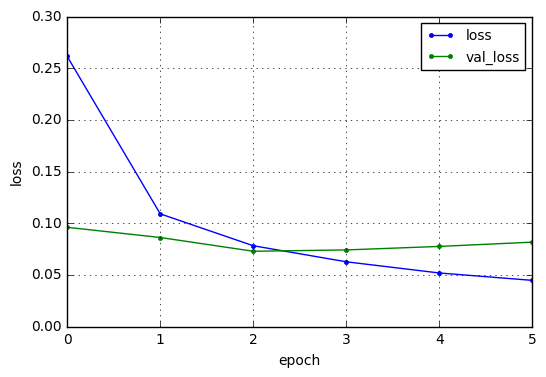

In [4]:
# evaluate
score = model.evaluate(X_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

nb_epoch = len(loss)

plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')